In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

irisdata = pd.read_csv ('iris.data',header=None)
irisdata.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']
irisdata.head(10)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Iris의 종류 확인하기
print(pd.unique(irisdata['Name']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#DataFrame을 Numpy 배열로 변환하기
iris_input = irisdata[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].to_numpy()
print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
#타깃 데이터 만들기
iris_target = irisdata["Name"].to_numpy()

In [ ]:
#사이킷 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=66)

ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [ ]:
print(kn.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']


In [ ]:
#테스트 셋의 처음 5개 샘플에 대한 확률 출력하기
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.667 0.333]
 [1.    0.    0.   ]
 [0.    1.    0.   ]]


In [ ]:
#세 번재 샘플의 이웃 확인하기
distances, indexes = kn.kneighbors(test_scaled[2:3])
print(train_target[indexes])

[['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']]


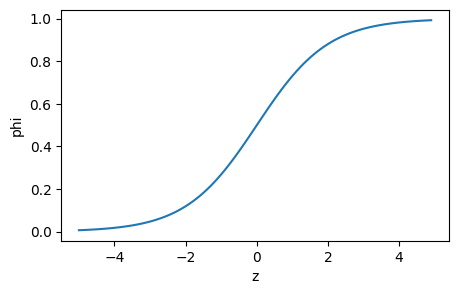

In [ ]:
#Numpy를 이용하여 로지스틱 함수 그래프 그리기
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.figure(figsize=(5,3))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
#로지스틱 회귀로 다중분류 수행하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
1.0


In [ ]:
#테스트 셋의 처음 10개 샘플 출력
print(lr.predict(test_scaled[:10]))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


In [ ]:
#테스트 셋의 처음 10개에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba, decimals=3))

[[0.001 0.996 0.003]
 [0.    0.963 0.037]
 [0.    0.945 0.055]
 [0.998 0.002 0.   ]
 [0.    0.993 0.006]
 [0.013 0.986 0.001]
 [0.999 0.001 0.   ]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [0.    0.229 0.771]]


In [ ]:
print(lr.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#선형방정식의 파라미터 형태 확인하기
print(lr.coef_ .shape, lr.intercept_.shape)
"""다중분류는 클래스마다 z 값을 하나씩 계산"""

(3, 4) (3,)


In [ ]:
#decision_function() 함수로 z1~z3값 구하기
decisions=lr.decision_function(test_scaled[:10])
print(np.round(decisions, decimals=2))
print()
print("배열 형태: ",decisions.shape)

[[ -2.84   4.3   -1.47]
 [ -6.09   4.68   1.42]
 [ -5.54   4.2    1.35]
 [ 13.23   7.01 -20.24]
 [ -4.25   4.65  -0.4 ]
 [ -0.6    3.71  -3.11]
 [ 13.77   6.88 -20.65]
 [ 17.     6.75 -23.76]
 [ 13.56   6.66 -20.22]
 [ -8.69   3.74   4.95]]

배열 형태:  (10, 3)


In [ ]:
#softmax 함수로 decision 값 확률로 변환
from scipy.special import softmax

proba = softmax(decisions, axis =1)
print(np.round(proba, decimals=3))

[[0.001 0.996 0.003]
 [0.    0.963 0.037]
 [0.    0.945 0.055]
 [0.998 0.002 0.   ]
 [0.    0.993 0.006]
 [0.013 0.986 0.001]
 [0.999 0.001 0.   ]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [0.    0.229 0.771]]
